In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# Load Data
data = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
data.shape

(9879, 40)

In [5]:
data.drop('gameId', axis=1, inplace=True)

In [6]:
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
y = data['blueWins']

In [8]:
X = data.drop('blueWins', axis=1, inplace=False)

In [9]:
X

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,19,2,1,8,9,15,0,0,0,0,...,0,17540,7.2,18057,204,59,810,1226,20.4,1754.0
1,15,4,1,7,2,6,1,0,1,1,...,0,14840,7.0,18136,223,72,-2979,-1183,22.3,1484.0
2,53,2,0,3,8,3,0,0,0,0,...,0,16940,7.0,18918,232,50,2502,1811,23.2,1694.0
3,19,4,1,10,9,12,0,0,0,0,...,0,17213,7.0,18119,198,52,-274,459,19.8,1721.3
4,15,1,0,7,5,10,0,0,0,0,...,0,15484,6.8,16654,208,46,-787,-846,20.8,1548.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,14,1,0,7,14,8,0,0,0,0,...,0,20244,7.2,19623,208,66,3908,2704,20.8,2024.4
9875,63,4,0,2,4,2,0,0,0,0,...,0,15550,6.8,17200,235,47,286,-606,23.5,1555.0
9876,16,1,0,5,6,3,2,1,1,0,...,0,16793,7.2,19444,237,56,704,1227,23.7,1679.3
9877,15,3,1,6,6,9,1,1,0,0,...,0,16683,7.0,18390,214,48,1081,2155,21.4,1668.3


<AxesSubplot:>

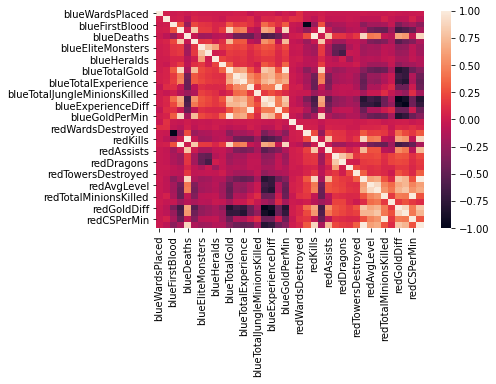

In [10]:
sns.heatmap(X.corr())

In [11]:
### Делим данные на 70% и 30%
train_test_split = 0.7
num_examples = X.shape[0]
num_train_examples = int(np.floor(num_examples * train_test_split))
num_test_examples = int(np.floor(num_examples - num_train_examples))

print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
6915
2964


## Model with "functional API"

In [13]:
### Слой Input - точка входа в сеть 38 признаков
inputs = tf.keras.Input(shape=(38,))

### Создаем 3 слоя, два из них по 16, а один 2
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


### Компиляция модели, оптимизатор

In [14]:
### Adam - этот алгоритм, используемый для обновления весов в нейронной сети на основе градиента функции потерь
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)



### SparseCategoricalCrossentropy - функция потерь для сравнения ее прогноза с истиной
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy']
)

In [15]:
### Разбиение данных
X_train = X.iloc[0:num_train_examples, :]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples, :]
y_test = y.iloc[num_train_examples:num_examples]

In [16]:
print(y_train.shape)
y_train.head()

(6915,)


0    1
1    1
2    0
3    0
4    1
Name: blueWins, dtype: int64

In [17]:
BATCH_SIZE = 32
EPOCHS = 300

In [18]:
X_train

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,19,2,1,8,9,15,0,0,0,0,...,0,17540,7.2,18057,204,59,810,1226,20.4,1754.0
1,15,4,1,7,2,6,1,0,1,1,...,0,14840,7.0,18136,223,72,-2979,-1183,22.3,1484.0
2,53,2,0,3,8,3,0,0,0,0,...,0,16940,7.0,18918,232,50,2502,1811,23.2,1694.0
3,19,4,1,10,9,12,0,0,0,0,...,0,17213,7.0,18119,198,52,-274,459,19.8,1721.3
4,15,1,0,7,5,10,0,0,0,0,...,0,15484,6.8,16654,208,46,-787,-846,20.8,1548.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,15,5,1,6,2,8,1,1,0,0,...,0,14118,6.6,17152,219,37,-3909,-1938,21.9,1411.8
6911,15,1,1,8,4,7,0,0,0,0,...,0,15517,6.8,17569,214,57,-2455,-2080,21.4,1551.7
6912,31,5,1,4,3,3,1,1,0,0,...,0,15351,6.8,18210,227,48,-525,-294,22.7,1535.1
6913,35,3,0,2,5,1,0,0,0,0,...,0,16057,6.8,18509,207,67,1441,-55,20.7,1605.7


In [19]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

## Обучение модели

In [20]:
model.fit(
    x=X_train,   ### 1
    y=y_train,   ### 2
    batch_size=BATCH_SIZE,   ## 3
    epochs=EPOCHS,   ### 4
    verbose=1, 
    validation_split=0.2,
    shuffle=True   ### 5
)

### 1 - Исходные данные
### 2 - Метки классов в формате прямого кодирования
### 3 - batch_size определяет, сколько наблюдений будет передаваться в сеть на кадом шаге обучения
### 4 - epochs определяет, сколько раз сеть будет просматривать полный комплект обучающих данных
### 5 - если shuffle=True, то пакеты обучающих данных будут перемешиваться случайным образом перед каждым шагом обучения

Epoch 1/300
173/173 [==============================] - 1s 2ms/step - loss: 758.7998 - accuracy: 0.5766 - val_loss: 20.9363 - val_accuracy: 0.7115
Epoch 2/300
173/173 [==============================] - 0s 908us/step - loss: 14.2259 - accuracy: 0.6543 - val_loss: 21.5229 - val_accuracy: 0.7166
Epoch 3/300
173/173 [==============================] - 0s 923us/step - loss: 12.6470 - accuracy: 0.6461 - val_loss: 9.3235 - val_accuracy: 0.7007
Epoch 4/300
173/173 [==============================] - 0s 872us/step - loss: 9.2347 - accuracy: 0.6333 - val_loss: 10.7515 - val_accuracy: 0.7028
Epoch 5/300
173/173 [==============================] - 0s 862us/step - loss: 12.5889 - accuracy: 0.6297 - val_loss: 7.5225 - val_accuracy: 0.7064
Epoch 6/300
173/173 [==============================] - 0s 880us/step - loss: 9.3541 - accuracy: 0.6302 - val_loss: 4.2219 - val_accuracy: 0.7187
Epoch 7/300
173/173 [==============================] - 0s 852us/step - loss: 6.7731 - accuracy: 0.6292 - val_loss: 20.0308 -

173/173 [==============================] - 0s 794us/step - loss: 1.3120 - accuracy: 0.6377 - val_loss: 2.2800 - val_accuracy: 0.6175
Epoch 113/300
173/173 [==============================] - 0s 826us/step - loss: 1.4470 - accuracy: 0.6710 - val_loss: 1.4876 - val_accuracy: 0.6985
Epoch 114/300
173/173 [==============================] - 0s 761us/step - loss: 1.1197 - accuracy: 0.6514 - val_loss: 1.6023 - val_accuracy: 0.6095
Epoch 115/300
173/173 [==============================] - 0s 828us/step - loss: 1.4808 - accuracy: 0.6623 - val_loss: 2.1886 - val_accuracy: 0.5293
Epoch 116/300
173/173 [==============================] - 0s 789us/step - loss: 1.5097 - accuracy: 0.6502 - val_loss: 0.7791 - val_accuracy: 0.6255
Epoch 117/300
173/173 [==============================] - 0s 880us/step - loss: 1.6429 - accuracy: 0.6456 - val_loss: 0.6125 - val_accuracy: 0.6992
Epoch 118/300
173/173 [==============================] - 0s 754us/step - loss: 1.0265 - accuracy: 0.6738 - val_loss: 1.0759 - val_ac

Epoch 168/300
173/173 [==============================] - ETA: 0s - loss: 0.5901 - accuracy: 0.67 - 0s 841us/step - loss: 0.5882 - accuracy: 0.6831 - val_loss: 0.5518 - val_accuracy: 0.7296
Epoch 169/300
173/173 [==============================] - 0s 851us/step - loss: 0.5625 - accuracy: 0.7250 - val_loss: 0.5444 - val_accuracy: 0.7383
Epoch 170/300
173/173 [==============================] - 0s 779us/step - loss: 0.5763 - accuracy: 0.7135 - val_loss: 0.5602 - val_accuracy: 0.7332
Epoch 171/300
173/173 [==============================] - 0s 739us/step - loss: 0.5788 - accuracy: 0.7034 - val_loss: 0.5557 - val_accuracy: 0.7158
Epoch 172/300
173/173 [==============================] - 0s 813us/step - loss: 0.5586 - accuracy: 0.7176 - val_loss: 0.5490 - val_accuracy: 0.7426
Epoch 173/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.6924 - val_loss: 0.5458 - val_accuracy: 0.7375
Epoch 174/300
173/173 [==============================] - 0s 990us/step - loss:

173/173 [==============================] - 0s 825us/step - loss: 0.5645 - accuracy: 0.7008 - val_loss: 0.5308 - val_accuracy: 0.7404
Epoch 279/300
173/173 [==============================] - 0s 815us/step - loss: 0.5573 - accuracy: 0.7209 - val_loss: 0.5326 - val_accuracy: 0.7477
Epoch 280/300
173/173 [==============================] - 0s 853us/step - loss: 0.5907 - accuracy: 0.7025 - val_loss: 0.5941 - val_accuracy: 0.6746
Epoch 281/300
173/173 [==============================] - 0s 811us/step - loss: 0.5619 - accuracy: 0.7127 - val_loss: 0.5465 - val_accuracy: 0.7296
Epoch 282/300
173/173 [==============================] - 0s 832us/step - loss: 0.5643 - accuracy: 0.7152 - val_loss: 0.5421 - val_accuracy: 0.7477
Epoch 283/300
173/173 [==============================] - 0s 798us/step - loss: 0.5604 - accuracy: 0.7133 - val_loss: 0.5566 - val_accuracy: 0.7433
Epoch 284/300
173/173 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.6978 - val_loss: 0.5405 - val_accu

### Оценка модели

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 847us/step - loss: 0.5708 - accuracy: 0.7264
